In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns=200

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [6]:
# read data
data = pd.read_csv('../data/loan.csv')
data.shape
data.head(1)

C:\Users\paresh.pradhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(39717, 111)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [7]:
# columns
# sorted(df.columns.tolist())

## Functions

In [8]:
def clean_earliest_cr_line_year(dtstr):
    # if nan then return nan
    if pd.isna(dtstr):
        return dtstr
    # if year greater than 50, add 19 prefix
    # else add 20 prefix
    year = str(dtstr)[-2:]
    if int(year) > 50:
        year = '19' + year
    else:
        year = '20' + year
    return year

## Data Understanding & Cleaning

In [16]:
"', '".join(data.columns)

"id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_

#### Identify Types of Columns

In [ ]:
target_cols = ['loan_status']
id_cols = ['id', 'member_id']
demographic_cols = [
    'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
]

#### Identify Categorical and Numerical Features

In [58]:
target_cols = ['loan_status']
id_cols = ['id', 'member_id']
numeric_cols = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 
    'mths_since_last_delinq', 'mths_since_last_record', 'revol_bal', 'revol_util', 'out_prncp', 
    'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
    'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt']
categorical_cols = [x for x in df.columns if x not in (numeric_cols + id_cols + target_cols)]

In [59]:
df_id = df[id_cols]
df_numeric = df[numeric_cols]
df_categorical = df[categorical_cols]

df_id.shape
df_id.head(1)
df_numeric.shape
df_numeric.head(1)
df_categorical.shape
df_categorical.head(1)

(39715, 2)

,id,member_id
0,1077501,1296599


(39715, 21)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,NaN,NaN,13648,83.7,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,171.62


(39715, 32)

,term,grade,sub_grade,emp_length,home_ownership,verification_status,issue_d,purpose,title,zip_code,addr_state,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,last_pymnt_d,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,issue_year,issue_month,last_pymnt_year,last_pymnt_month,last_credit_pull_year,last_credit_pull_month,earliest_cr_line_year,earliest_cr_line_month
0,36 months,B,B2,10+ years,RENT,Verified,Dec-11,credit_card,Computer,860xx,AZ,0,Jan-85,1,3,0,9,Jan-15,NaN,May-16,0.0,0.0,0.0,0.0,2011,Dec,2015,Jan,2016,May,1985,Jan


#### Missing Values

In [5]:
# check missing values
df_missing = pd.DataFrame(data.isnull().sum() / len(data)).reset_index().rename(columns={'index':'column_name', 0:'missing_propn'})
df_missing = df_missing.loc[df_missing['missing_propn'] >= 0.70]
df_missing

,column_name,missing_propn
29,mths_since_last_record,0.929854
47,next_pymnt_d,0.971297
50,mths_since_last_major_derog,1.000000
53,annual_inc_joint,1.000000
54,dti_joint,1.000000
55,verification_status_joint,1.000000
57,tot_coll_amt,1.000000
58,tot_cur_bal,1.000000
59,open_acc_6m,1.000000
60,open_il_6m,1.000000


#### Drop Unnecessary Columns

In [48]:
# dropping all blank columns
df = data.drop(df_missing.loc[df_missing['missing_propn'] == 1]['column_name'].tolist(), axis=1)
df.shape

(39717, 57)

In [49]:
# dropping columns that have only one value
# and hence don't add value
single_value_cols = ['pymnt_plan', 'initial_list_status', 'policy_code', 
                     'application_type', 'acc_now_delinq', 'delinq_amnt']
df = df.drop(single_value_cols, axis=1)
df.shape

(39717, 51)

In [50]:
# dropping columns that have textual data or minute details
text_cols = ['url', 'desc', 'emp_title']
df = df.drop(text_cols, axis=1)
df.shape

(39717, 48)

In [51]:
# df['tax_liens'].unique()

In [52]:
# columns
# sorted(df.columns.tolist())

#### Outliers

<AxesSubplot:xlabel='int_rate', ylabel='loan_status'>

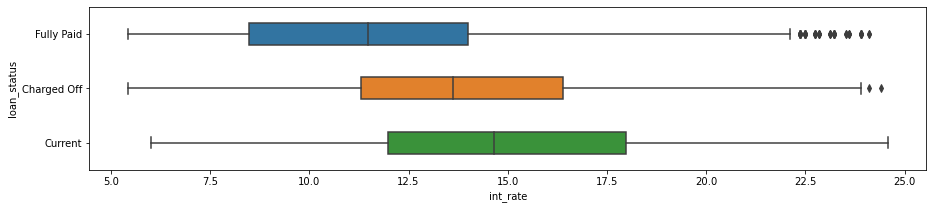

In [86]:
fig, ax = plt.subplots(figsize=[15, 3])
# sns.boxplot(data=df_numeric.drop(['loan_amnt', 'annual_inc'], axis=1))
sns.boxplot(data=df, y='loan_status', x='int_rate', width=.4)

In [54]:
# removing outliers from annual_inc
# df.loc[df['annual_inc'] > 3e6]
df = df.loc[df['annual_inc'] <= 3e6]
df.shape

(39715, 48)

#### Unique Count

In [55]:
# df.nunique()

#### Clean Percentage columns

In [56]:
df['int_rate'] = df['int_rate'].apply(lambda x: float(str(x).replace('%', '')))
df['revol_util'] = df['revol_util'].apply(lambda x: float(str(x).replace('%', '')))

#### Clean Date Columns

In [57]:
df['issue_year'] = df['issue_d'].apply(lambda x: '20' + str(x)[-2:] if pd.notna(x) else x)
df['issue_month'] = df['issue_d'].apply(lambda x: str(x)[:3] if pd.notna(x) else x)

df['last_pymnt_year'] = df['last_pymnt_d'].apply(lambda x: '20' + str(x)[-2:] if pd.notna(x) else x)
df['last_pymnt_month'] = df['last_pymnt_d'].apply(lambda x: str(x)[:3] if pd.notna(x) else x)

df['last_credit_pull_year'] = df['last_credit_pull_d'].apply(lambda x: '20' + str(x)[-2:] if pd.notna(x) else x)
df['last_credit_pull_month'] = df['last_credit_pull_d'].apply(lambda x: str(x)[:3] if pd.notna(x) else x)

df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(clean_earliest_cr_line_year)
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x: str(x)[:3] if pd.notna(x) else x)

In [60]:
# target variable
df['loan_status'].value_counts()

Fully Paid     32948
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [61]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

#### Checking Distributions for Numeric Variables

In [62]:
df_numeric.describe(percentiles=[0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95])

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,mths_since_last_delinq,mths_since_last_record,revol_bal,revol_util,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt
count,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,3.971500e+04,39715.000000,14034.000000,2786.000000,39715.000000,39665.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000
mean,11219.253431,10947.748332,10397.558773,12.021194,324.565629,6.872312e+04,13.315795,35.897820,69.698134,13383.083570,48.833407,51.230467,50.992336,12153.565021,11567.246396,9793.325817,2263.649782,1.363084,95.226419,12.406737,2678.855352
std,7456.472500,7187.321375,7128.576596,3.724911,208.878647,5.305153e+04,6.678104,22.017697,43.822529,15885.222411,28.332629,375.182109,373.833695,9042.120370,8942.839464,7065.601067,2608.137752,7.290156,688.761782,148.675311,4447.228825
min,500.000000,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5%,2400.000000,2400.000000,1872.987000,6.170000,71.244000,2.400000e+04,2.130000,3.000000,0.000000,321.700000,2.700000,0.000000,0.000000,1887.779189,1420.307000,1339.793000,186.167000,0.000000,0.000000,0.000000,43.335000
10%,3200.000000,3200.000000,2950.000000,7.140000,99.450000,3.000000e+04,4.080000,8.000000,0.000000,1117.000000,8.500000,0.000000,0.000000,2968.889290,2460.268000,2200.000000,316.662000,0.000000,0.000000,0.000000,95.988000
25%,5500.000000,5400.000000,5000.000000,9.250000,166.985000,4.040200e+04,8.180000,18.000000,22.000000,3703.500000,25.400000,0.000000,0.000000,5576.990000,5112.205000,4600.000000,662.235000,0.000000,0.000000,0.000000,218.675000
50%,10000.000000,9600.000000,8975.000000,11.860000,280.220000,5.900000e+04,13.400000,34.000000,90.000000,8851.000000,49.300000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000
75%,15000.000000,15000.000000,14400.000000,14.590000,430.780000,8.229800e+04,18.600000,52.000000,104.000000,17060.000000,72.400000,0.000000,0.000000,16534.120230,15799.370000,13652.135000,2833.270000,0.000000,0.000000,0.000000,3292.990000
90%,22000.000000,21000.000000,20000.000000,16.890000,622.958000,1.160000e+05,22.330000,69.000000,113.000000,29144.600000,87.800000,0.000000,0.000000,24777.528852,24083.988000,20000.000000,5336.274000,0.000000,13.602000,0.000000,8312.770000


## Analysis

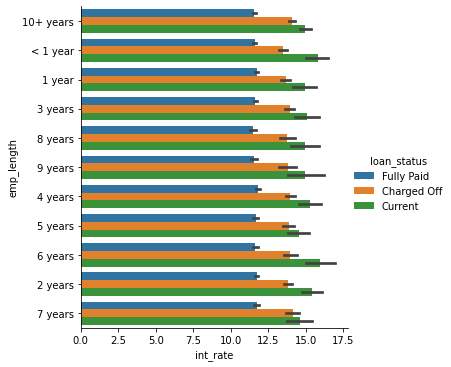

In [133]:
# fig, ax = plt.subplots(figsize=[15,6])
sns.catplot(data=df, x='int_rate', y='emp_length', hue='loan_status', kind='bar', orient='h')

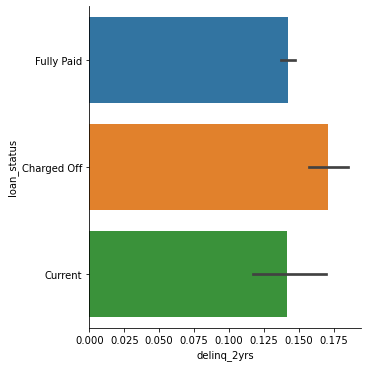

In [149]:
# fig, ax = plt.subplots(figsize=[15,6])
sns.catplot(data=df, y='loan_status', x='delinq_2yrs', kind='bar', orient='h')

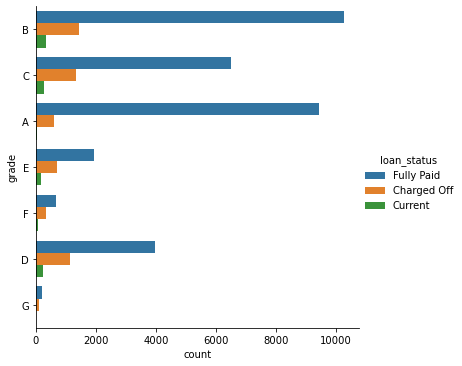

In [155]:
# fig, ax = plt.subplots(figsize=[15,6])
sns.catplot(data=df, y='grade', hue='loan_status', kind='count', orient='h')

In [158]:
df.groupby(['loan_status', 'grade'])['id'].agg('count')

loan_status  grade
Charged Off  A          602
             B         1425
             C         1347
             D         1118
             E          715
             F          319
             G          101
Current      A           40
             B          345
             C          264
             D          222
             E          179
             F           73
             G           17
Fully Paid   A         9443
             B        10249
             C         6486
             D         3967
             E         1948
             F          657
             G          198
Name: id, dtype: int64

In [114]:
# fig, ax = plt.subplots(figsize=[15,15])
# sns.heatmap(df_numeric.corr())

Insights
- Interest rates are higher for charged off
- within that, home & education loans are higher
- maybe some relationship with 'inq_last_6mths' > 4 
- grade seems to have the highest impact